<a href="https://colab.research.google.com/github/querenneves/Aprendizado-profundo/blob/main/Semana_3_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import SimpleRNN, Dense, Activation, Embedding, LSTM, Bidirectional
from keras.utils import pad_sequences
from keras.datasets import imdb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Carregamento dos dados (IMDB)

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

In [3]:
(X_train,Y_train), (X_test, Y_test) = imdb.load_data(path = "imdb.npz",
                                    num_words = None,
                                    skip_top = 0,
                                    maxlen = None,
                                    seed = 113,
                                    start_char = 1,
                                    oov_char = 2,
                                    index_from = 3)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
print("X_train: ",X_train.shape)
print("Y_train: ",Y_train.shape)
print("X_test: ",X_test.shape)
print("Y_test: ",Y_test.shape)

print("Classes existentes: ", np.unique(Y_train))

X_train:  (25000,)
Y_train:  (25000,)
X_test:  (25000,)
Y_test:  (25000,)
Classes existentes:  [0 1]


In [5]:
unique,  cc = np.unique(Y_train, return_counts = True)
print("Distribuição dos classes (treino): ", dict(zip(unique,cc)))

Distribuição dos classes (treino):  {np.int64(0): np.int64(12500), np.int64(1): np.int64(12500)}


In [6]:
unique,  cc = np.unique(Y_test, return_counts = True)
print("Distribuição dos classes (teste): ", dict(zip(unique,cc)))

Distribuição dos classes (teste):  {np.int64(0): np.int64(12500), np.int64(1): np.int64(12500)}


## Exemplos de Reviews (Sentenças)

In [7]:
# obtenção do dicionário (id --> palavra)
dicionario = imdb.get_word_index()
num_words = len(dicionario)
print("Número total de palavras no dicionário: ", num_words)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Número total de palavras no dicionário:  88584


In [8]:
# Algumas palavras (10 mais frequentes)
for (word, id) in dicionario.items():
  if id <= 10:
    print(id, word)


10 i
9 it
6 is
8 in
4 of
3 a
7 br
1 the
2 and
5 to


In [9]:
def Decode(idx = 1):
    reverse_index = dict([(id,word) for (word, id) in dicionario.items()])
    sentenca = " ".join([reverse_index.get(i - 3, "!") for i in X_train[idx]])
    return sentenca

In [10]:
# Exemplo de sentença (ids)
idx = 5
sentenca = Decode(idx)
print("Ids: ", np.array(X_train[idx])-3) # subtração do 3 - codificação inicial
print("Sentenca: ", sentenca)
print("Comprimento: ", len(X_train[idx]))
print("Classe: ", Y_train[idx])



Ids:  [   -2   775   125    71     9   627   160    12     1  1763  7979  1048
 43219    29    82   153    42    37   145   136   118   661   662     7
     7  1358   170     1   746 86585    13  3801     5     1   223    62
     9    40   124    21 15341     7     7]
Sentenca:  ! begins better than it ends funny that the russian submarine crew outperforms all other actors it's like those scenes where documentary shots br br spoiler part the message dechifered was contrary to the whole story it just does not mesh br br
Comprimento:  43
Classe:  0


# Pré-processamento

Padding, redução do dicionário e dimensão de embedding

In [11]:
# reduzindo o número de palavras no dicionário
# para reduzir o número de parâmetros do modelo
num_words = 5000
(X_train,Y_train), (X_test, Y_test) = imdb.load_data(num_words = num_words)

maxlen = 100
embedding = 16


In [12]:
# Tamanho maximo da sentença
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

print(X_train[5])
decoded_review = Decode(5)

# palavras fora do dicionário (ausentes | >num_words)
# são substituídos por oov_char (2)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1  778  128   74   12  630  163   15    4 1766    2 1051    2
   32   85  156   45   40  148  139  121  664  665   10   10 1361  173
    4  749    2   16 3804    8    4  226   65   12   43  127   24    2
   10   10]


# Modelo 01: RNN Vanilla

## Definição do Modelo

In [15]:
modelo01 = keras.Sequential()
modelo01.add(Embedding(num_words, embedding, input_length = len(X_train[0])))
modelo01.add(SimpleRNN(10, return_sequences = True))
modelo01.add(SimpleRNN(10, return_sequences = False))
modelo01.add(Dense(1, activation="sigmoid"))

# Build the model
modelo01.build(input_shape=(None, maxlen))

# modelo01.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
modelo01.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 100, 10)        │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,491 (314.42 KB)

 Trainable params: 80,491 (314.42 KB)

 Non-trainable params: 0 (0.00 B)

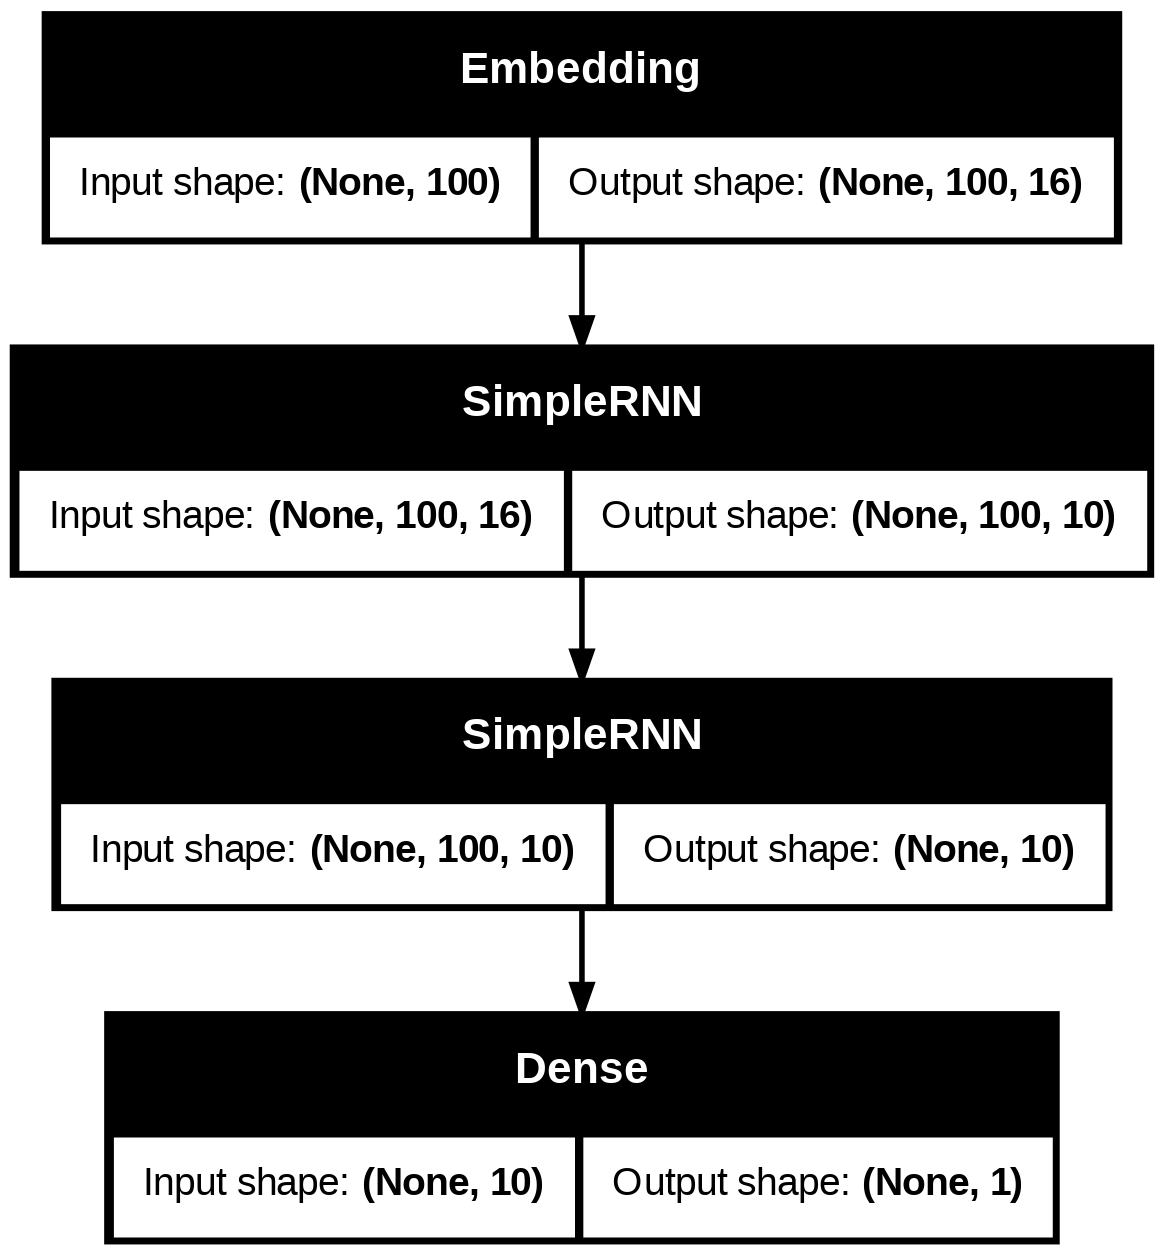

In [16]:
tf.keras.utils.plot_model(modelo01, show_shapes=True)

## Treinamento do Modelo01

In [17]:
modelo01.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])
history = modelo01.fit(X_train, Y_train, validation_split=0.1, epochs = 10, batch_size = 128, verbose = 1)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.5919 - loss: 0.6541 - val_accuracy: 0.7824 - val_loss: 0.4737
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8044 - loss: 0.4352 - val_accuracy: 0.8276 - val_loss: 0.3993
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8483 - loss: 0.3606 - val_accuracy: 0.8496 - val_loss: 0.3688
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8874 - loss: 0.2857 - val_accuracy: 0.8428 - val_loss: 0.3760
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9087 - loss: 0.2371 - val_accuracy: 0.8392 - val_loss: 0.3948
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9194 - loss: 0.2100 - val_accuracy: 0.8300 - val_loss: 0.4349
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9434 - loss: 0.1629 - val_accuracy: 0.8200 - val_loss: 0.4621
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9519 - loss: 0.1395 - val_acc

## Avaliação

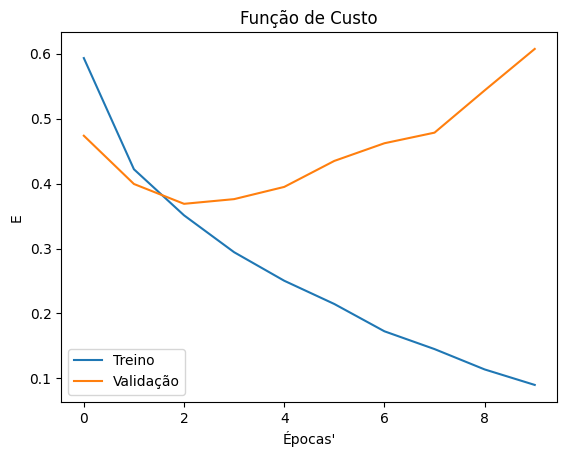

In [18]:
plt.figure()
plt.plot(history.history["loss"], label = "Treino")
plt.plot(history.history["val_loss"], label = "Validação")
plt.title("Função de Custo")
plt.ylabel("E")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

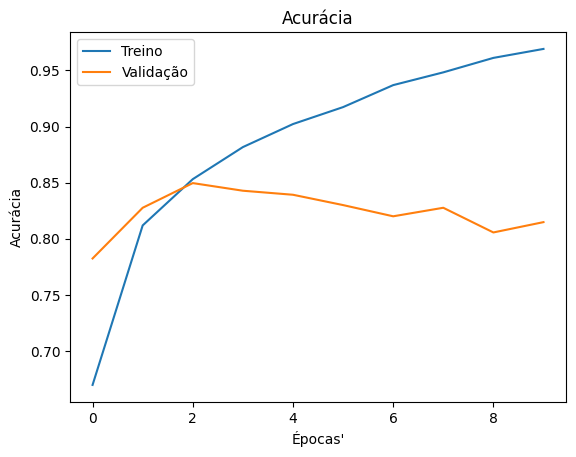

In [19]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Treino")
plt.plot(history.history["val_accuracy"], label = "Validação")
plt.title("Acurácia")
plt.ylabel("Acurácia")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

## Acurácia no conjunto de teste

In [20]:
score = modelo01.evaluate(X_test, Y_test)
print("Acurácia final: %", score[1]*100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8159 - loss: 0.6172
Acurácia final: % 81.84800148010254


## Confusion Matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


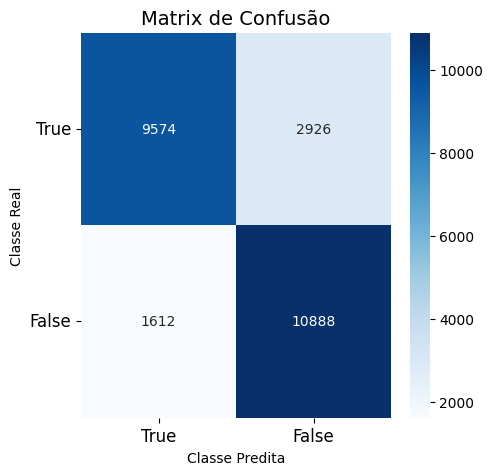

True Positive: 9574
True Negative: 10888
False Positive: 2926
False Negative: 1612


In [21]:
y_pred = modelo01.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(Y_test,y_pred)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm )

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Classe Predita")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Classe Real")
plt.title("Matrix de Confusão", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

# Modelo 02: LSTM

## Definição do Modelo

In [24]:
modelo02 = keras.Sequential()
modelo02.add(Embedding(num_words, embedding, input_length = len(X_train[0])))
modelo02.add(LSTM(10, return_sequences=True))
modelo02.add(LSTM(10))
# modelo02.add(Bidirectional(LSTM(12, return_sequences=True)))
# modelo02.add(Bidirectional(LSTM(12)))
modelo02.add(Dense(1, activation="sigmoid"))

modelo02.build(input_shape=(None, maxlen))

modelo02.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 10)        │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,931 (320.04 KB)

 Trainable params: 81,931 (320.04 KB)

 Non-trainable params: 0 (0.00 B)

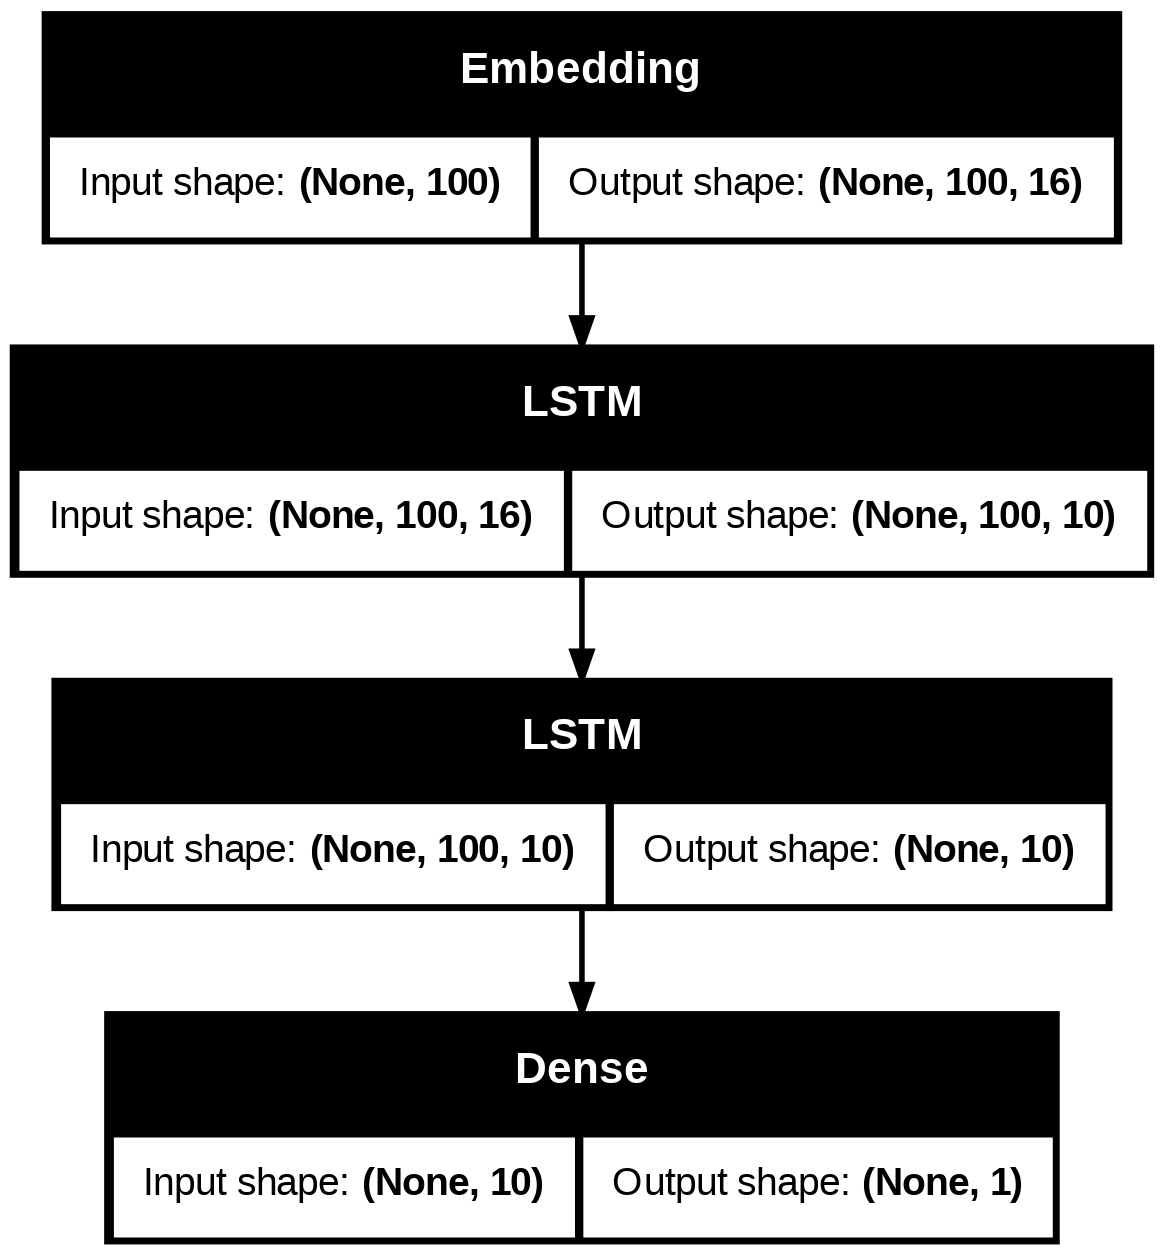

In [25]:
tf.keras.utils.plot_model(modelo02, show_shapes=True)

## Treinamento do Modelo01

In [26]:
modelo02.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])
history = modelo02.fit(X_train, Y_train, validation_split=0.1, epochs = 10, batch_size = 128, verbose = 1)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5612 - loss: 0.6656 - val_accuracy: 0.7964 - val_loss: 0.4517
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8016 - loss: 0.4405 - val_accuracy: 0.7620 - val_loss: 0.4978
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8417 - loss: 0.3687 - val_accuracy: 0.8432 - val_loss: 0.3640
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8687 - loss: 0.3178 - val_accuracy: 0.8324 - val_loss: 0.3818
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8832 - loss: 0.2887 - val_accuracy: 0.8516 - val_loss: 0.3418
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8946 - loss: 0.2626 - val_accuracy: 0.8256 - val_loss: 0.3761
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9016 - loss: 0.2457 - val_accuracy: 0.8408 - val_loss: 0.3641
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9059 - loss: 0.2355 - val_accu

## Avaliação

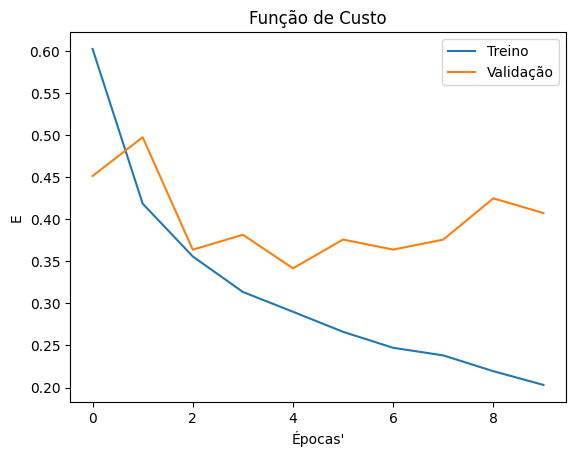

In [27]:
plt.figure()
plt.plot(history.history["loss"], label = "Treino")
plt.plot(history.history["val_loss"], label = "Validação")
plt.title("Função de Custo")
plt.ylabel("E")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

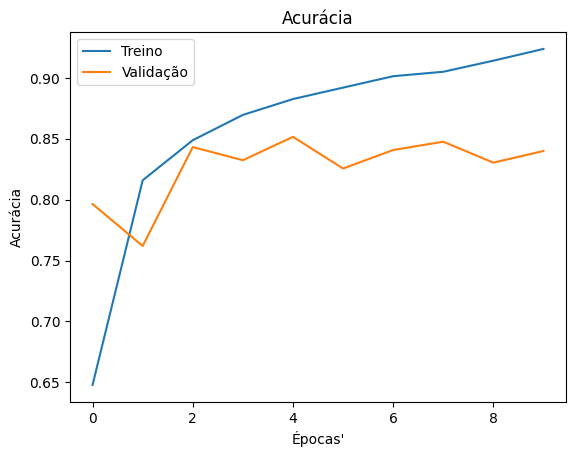

In [28]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Treino")
plt.plot(history.history["val_accuracy"], label = "Validação")
plt.title("Acurácia")
plt.ylabel("Acurácia")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

## Acurácia no conjunto de teste

In [29]:
score = modelo02.evaluate(X_test, Y_test)
print("Acurácia final: %", score[1]*100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8410 - loss: 0.4019
Acurácia final: % 84.31199789047241


## Confusion Matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


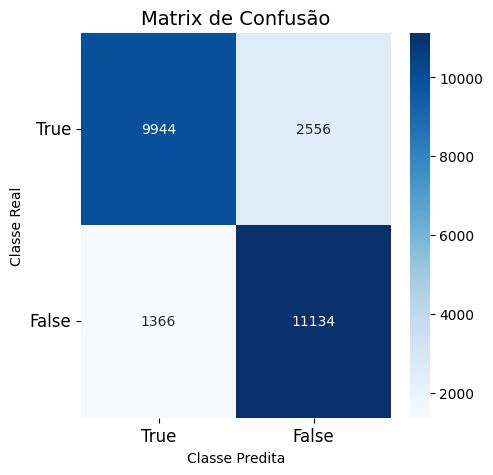

True Positive: 9944
True Negative: 11134
False Positive: 2556
False Negative: 1366


In [30]:
y_pred = modelo02.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(Y_test,y_pred)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm )

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Classe Predita")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Classe Real")
plt.title("Matrix de Confusão", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))